### IMPORTING LIBRARIES

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### DATA IMPORTATION AND CLEANING

In [203]:
df = pd.read_csv("train.csv")

In [12]:
df.shape

(891, 12)

In [204]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [205]:
##Dropping two missing values in "Embarked" column
df.dropna(subset = ["Embarked"], inplace = True)
##Filling "Age" column with mean
df["Age"].fillna(int(df["Age"].mean()), inplace = True)
##Filling "Cabin" with Mode
df["Cabin"].fillna(df["Cabin"].mode().iloc[0], inplace = True)

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

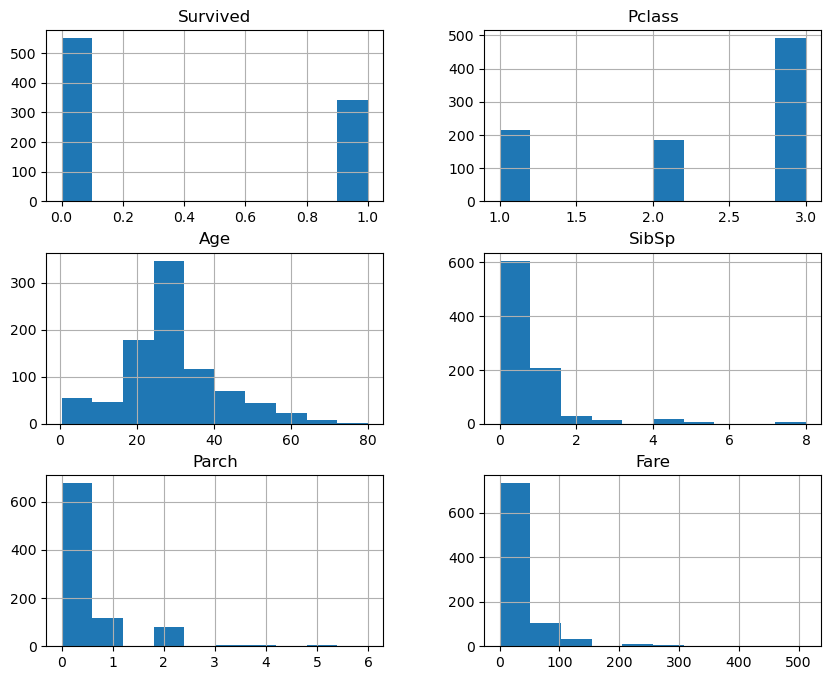

In [206]:
df.copy().drop("PassengerId", axis = 1).hist(figsize = (10,8))

### SEX SURVIVAL ANALYSIS
Understanding the survival rates based on sex

In [207]:
##Gender Proportion
df["Sex"].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [208]:
df_sex = df.copy()

In [209]:
df_sex["Survived"] = np.where(df_sex["Survived"] == 0, "No", "Yes")

In [210]:
survival_table = pd.crosstab(df_sex["Sex"],df_sex["Survived"])
print(survival_table)


Survived   No  Yes
Sex               
female     81  231
male      468  109


In [211]:
fem_surv_rate = (survival_table.iloc[0,1]/(survival_table.iloc[0,1]+survival_table.iloc[0,0]))*100
mal_surv_rate = (survival_table.iloc[1,1]/(survival_table.iloc[1,1]+survival_table.iloc[1,0]))*100
print(f"Female Survival Rate: {round(fem_surv_rate,2)}%")
print(f"Male Survival Rate: {round(mal_surv_rate,2)}%")

Female Survival Rate: 74.04%
Male Survival Rate: 18.89%


<function matplotlib.pyplot.show(close=None, block=None)>

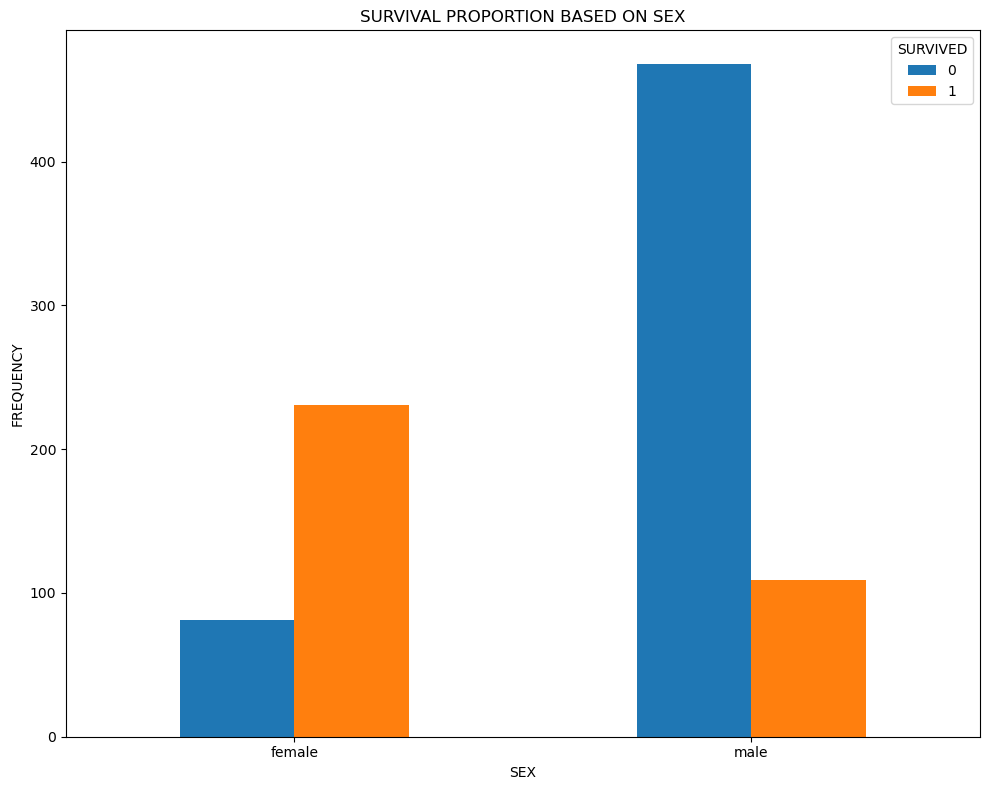

In [168]:
survival_table.plot(kind="bar", rot = 0, figsize=(10,8))
plt.title("SURVIVAL PROPORTION BASED ON SEX")
plt.xlabel("SEX")
plt.ylabel("FREQUENCY")
plt.legend(title = "SURVIVED")
plt.tight_layout()
plt.show

### AGE SURVIVAL ANALYSIS

In [115]:
def agegroup(val):
    val = int(val)
    if val <= 12:
        return "Child"
    elif val <= 19:
        return "Teenager"
    elif val <= 24:
        return "Young Adult"
    elif val <= 59:
        return "Adult"
    else: 
        return "ELderly" 

In [132]:
agegroup_data = df.copy()
agegroup_data["Age"] = agegroup_data["Age"].apply(agegroup)

In [135]:
agegroup_data["Age"].value_counts()

Adult          586
Young Adult    114
Teenager        95
Child           69
ELderly         25
Name: Age, dtype: int64

In [138]:
survival_age = pd.crosstab(agegroup_data["Age"],agegroup_data["Survived"]) 
print(survival_age)

Survived      No  Yes
Age                  
Adult        370  216
Child         29   40
ELderly       19    6
Teenager      56   39
Young Adult   75   39


<function matplotlib.pyplot.show(close=None, block=None)>

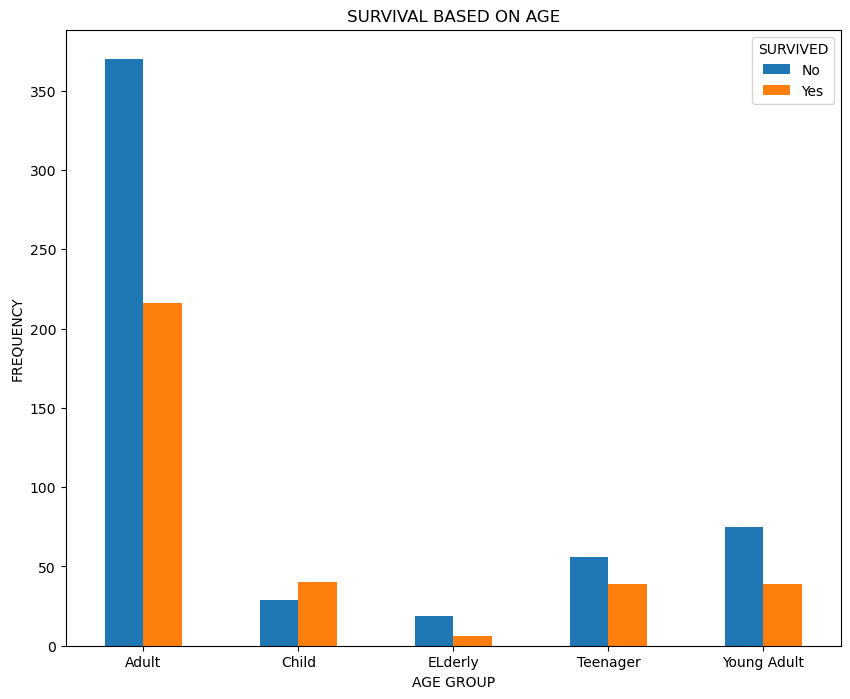

In [167]:
survival_age.plot(kind = "bar", rot = 0,figsize=(10,8))
plt.xlabel("AGE GROUP")
plt.ylabel("FREQUENCY")
plt.title("SURVIVAL BASED ON AGE")
plt.legend(title="SURVIVED")
plt.tight_layout
plt.show

In [143]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


<function matplotlib.pyplot.show(close=None, block=None)>

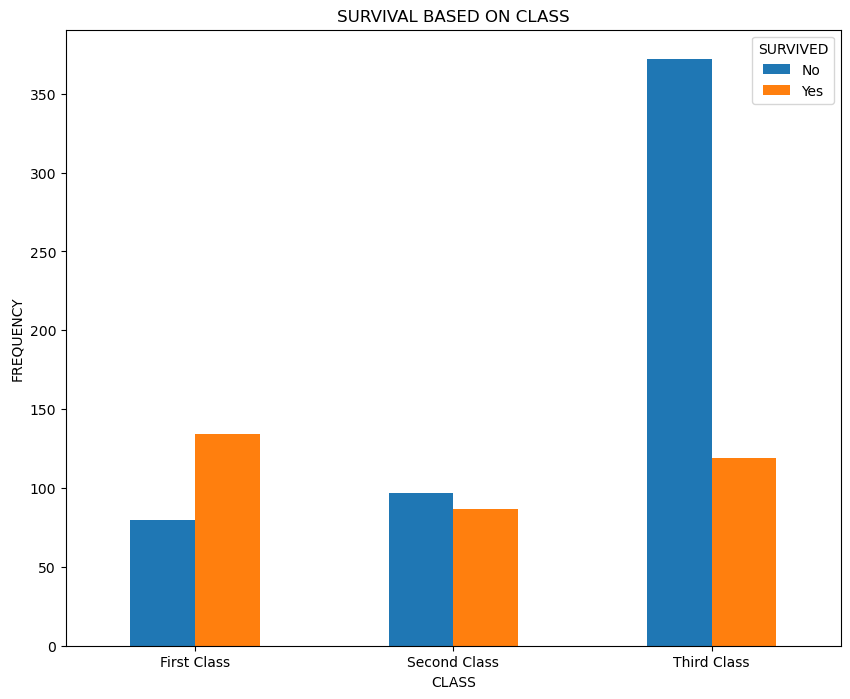

In [183]:
df_class = df_sex.copy()
df_class["Pclass"] = df_class["Pclass"].map({1: "First Class", 2: "Second Class", 3: "Third Class"})
survival_class = pd.crosstab(df_class["Pclass"],df_class["Survived"])
survival_class.plot(kind = "bar", rot = 0,figsize=(10,8))
plt.xlabel("CLASS")
plt.ylabel("FREQUENCY")
plt.title("SURVIVAL BASED ON CLASS")
plt.legend(title="SURVIVED")
plt.tight_layout
plt.show

In [190]:
df_Sclass = pd.crosstab([df_class["Pclass"],df_class["Sex"]], df_class["Survived"]) 
print(df_Sclass)

Survived              No  Yes
Pclass       Sex             
First Class  female    3   89
             male     77   45
Second Class female    6   70
             male     91   17
Third Class  female   72   72
             male    300   47


<Axes: xlabel='Pclass,Sex'>

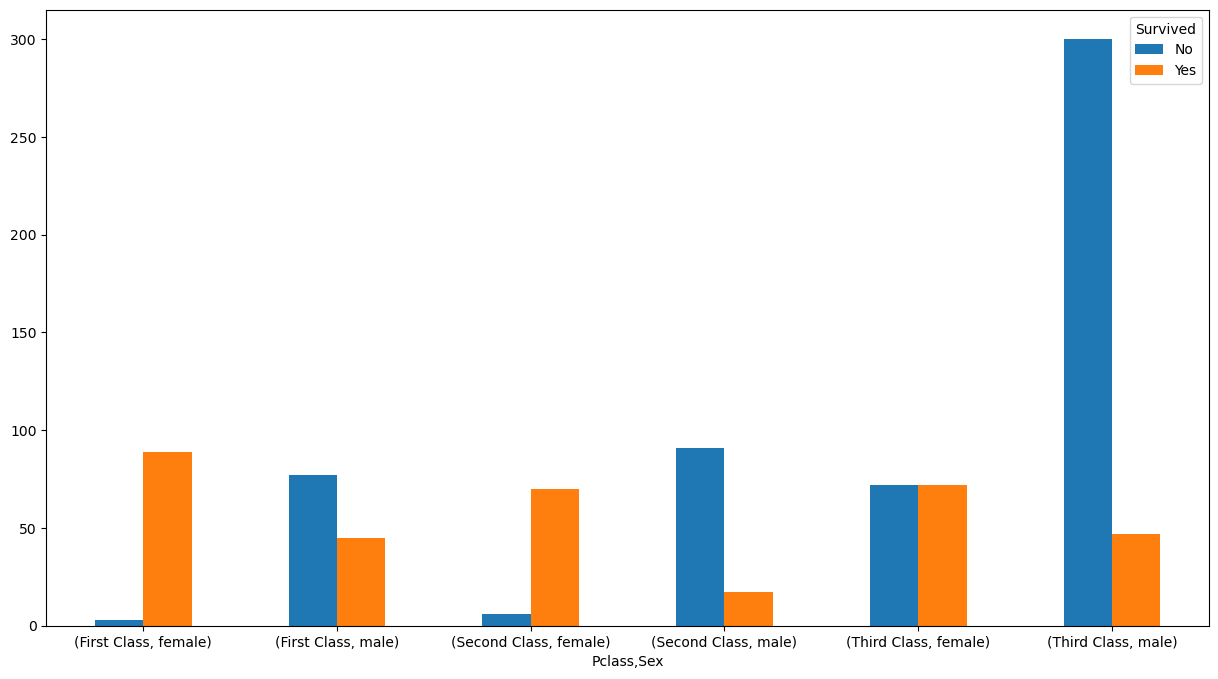

In [192]:
df_Sclass.plot(kind= "bar", rot = 0, figsize = (15,8))

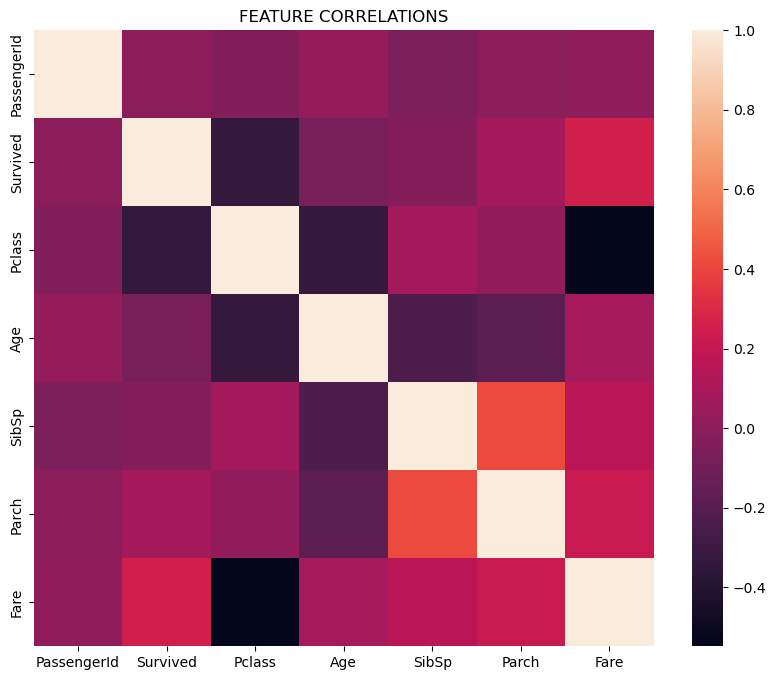

In [175]:
plt.figure(figsize=(10, 8))  
data_numeric= df.copy().select_dtypes(include=np.number)
sns.heatmap(data_numeric.corr())
plt.title('FEATURE CORRELATIONS')
plt.show()

<Axes: xlabel='Embarked'>

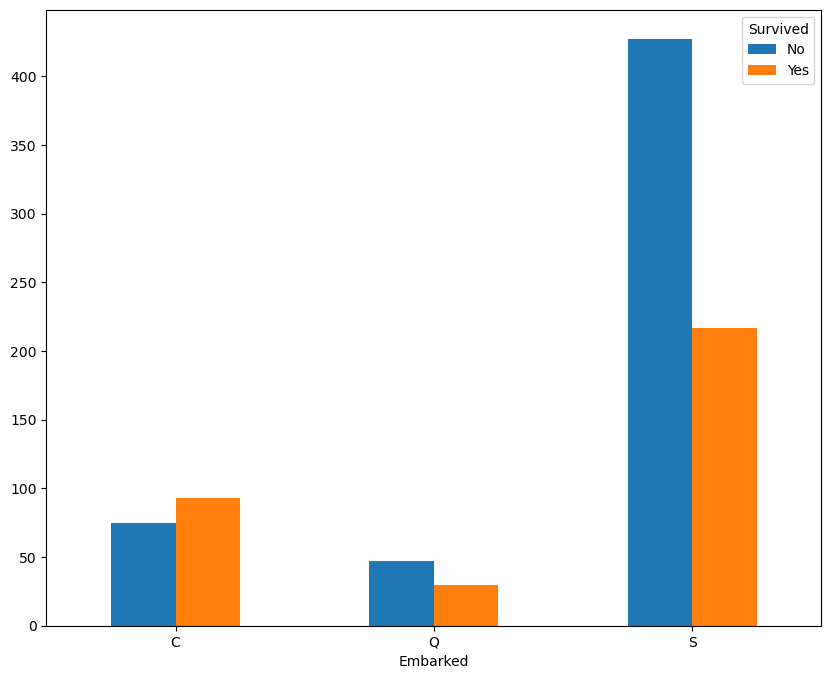

In [213]:
embarked = pd.crosstab(df["Embarked"],df_sex["Survived"])
embarked.plot(kind="bar", rot = 0, figsize =(10,8))